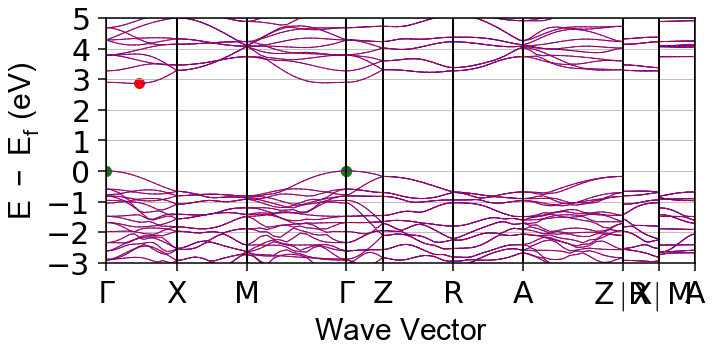

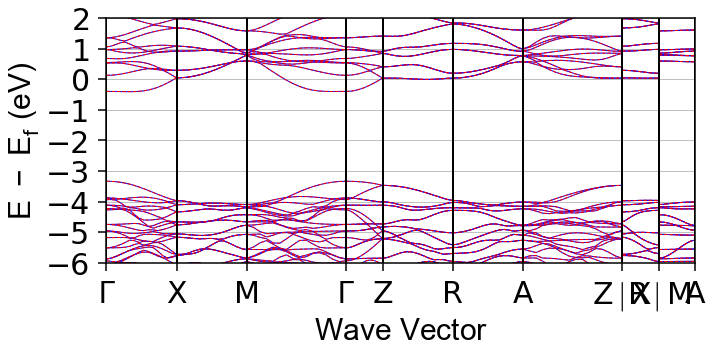

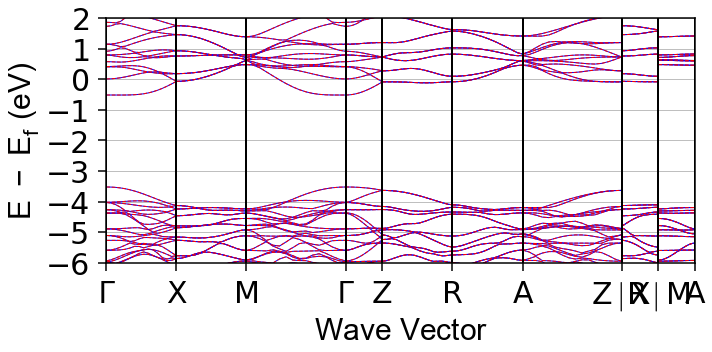

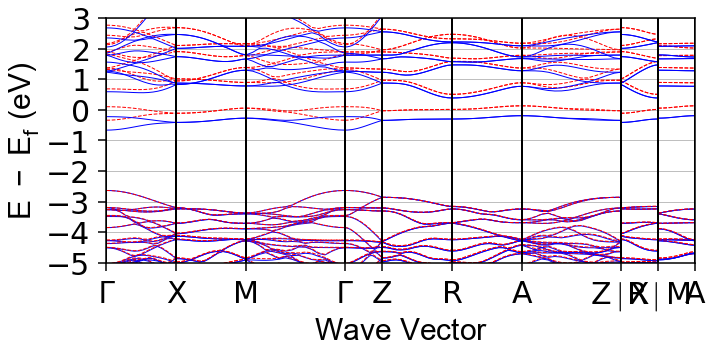

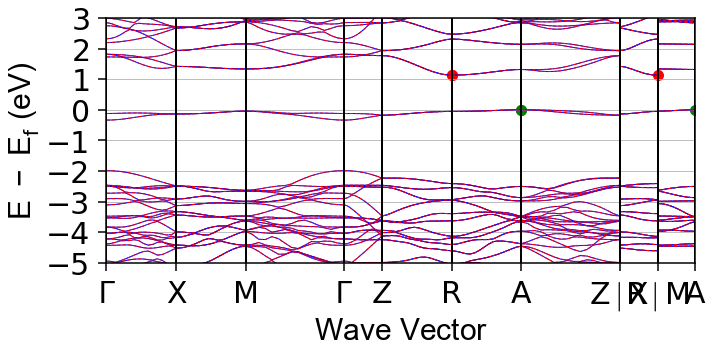

In [10]:
from pymatgen.io.vasp import Vasprun, BSVasprun
from pymatgen.electronic_structure.plotter import BSPlotter

YLIMS = [[-3,5]] + [[-6,2]]*2 + [[-5,3]]*2

for i, suffix in enumerate(['d0','d025','d05','d075', 'd1']):
    v = BSVasprun(f"vasprun-{suffix}.xml")
    bs = v.get_band_structure(kpoints_filename="KPOINTS",line_mode=True)
    plt = BSPlotter(bs)
    plot = plt.get_plot(vbm_cbm_marker=True,ylim=YLIMS[i])
    fig = plot.gcf()
    fig.set_size_inches(10, 5)    #plt.bs_plot_data(zero_to_efermi=True)
    #plt.show()
    plt.save_plot(f"elec_bands-vec-{suffix}.pdf",img_format='pdf',ylim=YLIMS[i])
    plt.save_plot(f"elec_bands-{suffix}.png",img_format='png',ylim=YLIMS[i])